In [1]:
import pandas as pd

df_meter = pd.read_csv('EV_train.csv')
df_label = pd.read_csv('EV_train_labels.csv')

/Anaconda/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
df_meter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1590 entries, 0 to 1589
Columns: 2881 entries, House ID to Interval_2880
dtypes: float64(2880), int64(1)
memory usage: 34.9 MB


In [3]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1590 entries, 0 to 1589
Columns: 2881 entries, House ID to Interval_2880
dtypes: int64(2881)
memory usage: 34.9 MB


In [4]:
df_meter.head()

,House ID,Interval_1,Interval_2,Interval_3,Interval_4,Interval_5,Interval_6,Interval_7,Interval_8,Interval_9,...,Interval_2871,Interval_2872,Interval_2873,Interval_2874,Interval_2875,Interval_2876,Interval_2877,Interval_2878,Interval_2879,Interval_2880
0,11655099,0.950,0.826,0.361,0.238,0.342,0.233000,0.351000,0.194000,0.292000,...,0.664,0.783,0.601,0.639,0.417,0.439,0.226,0.190,0.710,0.728
1,11633257,0.353,0.327,0.358,0.292,0.285,0.304000,0.361000,0.342000,0.355000,...,0.536,0.558,0.622,0.634,0.513,0.421,0.273,0.296,0.291,0.289
2,11651552,0.150,0.181,0.150,0.150,0.131,0.125000,0.088000,0.106000,0.094000,...,2.125,0.881,0.481,1.194,0.138,0.119,0.038,0.088,0.056,0.113
3,11636092,2.088,2.075,2.121,2.098,2.046,2.081000,1.847000,0.420000,0.399000,...,0.620,0.487,0.563,0.419,0.379,0.359,0.347,0.325,0.330,0.340
4,11647239,1.416,1.250,1.270,1.258,1.239,1.753105,4.609256,4.619256,4.075151,...,1.596,1.667,1.569,1.664,1.580,1.635,1.568,1.565,1.575,1.571


In [5]:
df_label.head()

,House ID,Interval_1,Interval_2,Interval_3,Interval_4,Interval_5,Interval_6,Interval_7,Interval_8,Interval_9,...,Interval_2871,Interval_2872,Interval_2873,Interval_2874,Interval_2875,Interval_2876,Interval_2877,Interval_2878,Interval_2879,Interval_2880
0,11655099,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11633257,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11651552,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11636092,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11647239,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_meter.set_index('House ID', inplace=True)
df_label.set_index('House ID', inplace=True)

In [7]:
df_nan = df_meter[pd.isnull(df_meter).any(axis=1)]

In [8]:
df_nan

,Interval_1,Interval_2,Interval_3,Interval_4,Interval_5,Interval_6,Interval_7,Interval_8,Interval_9,Interval_10,...,Interval_2871,Interval_2872,Interval_2873,Interval_2874,Interval_2875,Interval_2876,Interval_2877,Interval_2878,Interval_2879,Interval_2880
House ID,,,,,,,,,,,,,,,,,,,,,
11637447,2.395,2.380,2.336,2.417,2.422,2.497,2.486,3.015,2.317,2.336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11635802,0.249,0.271,0.266,0.255,0.247,0.280,0.178,0.237,0.133,0.186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11637232,1.218,1.087,0.995,0.791,0.798,0.756,0.745,0.736,0.699,0.691,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11632700,0.113,0.106,0.113,0.150,0.119,0.106,0.100,0.144,0.144,0.106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_meter = df_meter.drop(df_nan.index.tolist())

In [10]:
df_label = df_label.drop(df_nan.index.tolist())

In [11]:
# All the houses which have EV present
df_EV = df_label.loc[df_label.any(axis=1)]

In [12]:
df_EV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484 entries, 11647239 to 11650303
Columns: 2880 entries, Interval_1 to Interval_2880
dtypes: int64(2880)
memory usage: 10.6 MB


In [13]:
print('{} % of all Houses have EV present in them'.format(485*100/1586))

30.580075662042876 % of all Houses have EV present in them


In [14]:
df_EV.head()

,Interval_1,Interval_2,Interval_3,Interval_4,Interval_5,Interval_6,Interval_7,Interval_8,Interval_9,Interval_10,...,Interval_2871,Interval_2872,Interval_2873,Interval_2874,Interval_2875,Interval_2876,Interval_2877,Interval_2878,Interval_2879,Interval_2880
House ID,,,,,,,,,,,,,,,,,,,,,
11647239,0,0,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
11655054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11635803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11642383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11655167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
pct_charging = df_EV.mean(axis=0)*100

In [16]:
df_pct = pct_charging.to_frame()

In [17]:
df_pct = df_pct.reset_index()

In [18]:
df_pct.columns = ['index','count_pct']

In [19]:
df_pct = df_pct.drop(['index'], axis=1)

In [20]:
df_pct['interval No.'] = [x+1 for x in df_pct.index.tolist()]

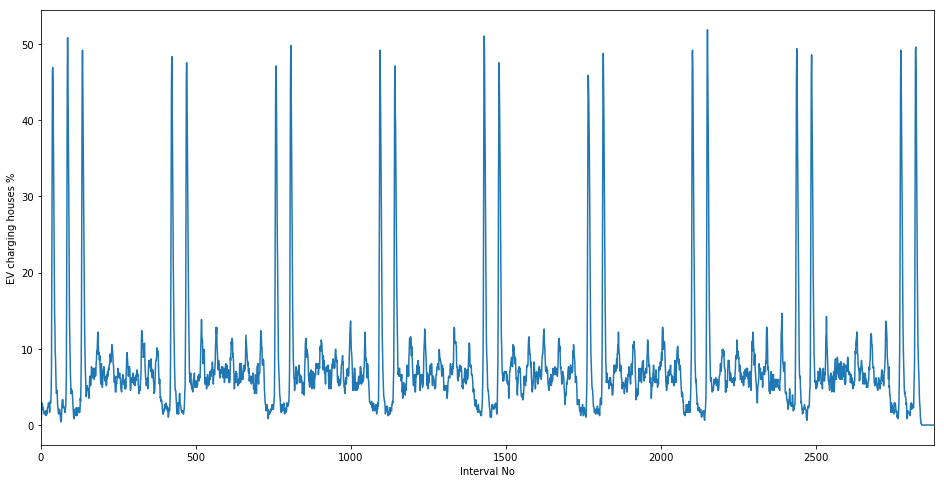

In [21]:
import matplotlib.pyplot as plt

plt.figure (figsize=(16,8))
plt.plot(df_pct['interval No.'],df_pct['count_pct'])
plt.xlabel('Interval No')
plt.ylabel('EV charging houses %')
plt.xlim(0,2880)
plt.show()


In [22]:
df_EV_meter = df_meter.filter(items=df_EV.index.tolist(), axis=0)

In [23]:
import numpy as np
noEVindex= list(set(df_meter.index.tolist())-set(df_EV_meter.index.tolist()))

In [24]:
df_noEV_meter = df_meter.filter(items=noEVindex, axis=0)

In [25]:
df_noEV_meter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 11655170 to 11642875
Columns: 2880 entries, Interval_1 to Interval_2880
dtypes: float64(2880)
memory usage: 24.2 MB


In [26]:
df_EV_meter_des = df_EV_meter.mean(axis=0).rename('Mean').to_frame()
df_EV_meter_des['Median'] = df_EV_meter.median(axis=0)
df_EV_meter_des['Max'] = df_EV_meter.max(axis=0)
df_EV_meter_des['Min'] = df_EV_meter.min(axis=0)


In [27]:
df_EV_meter_des = df_EV_meter_des.reset_index()
df_EV_meter_des = df_EV_meter_des.drop(['index'], axis=1)
df_EV_meter_des['interval No.'] = [x+1 for x in df_EV_meter_des.index.tolist()]

In [28]:
df_noEV_meter_des = df_noEV_meter.mean(axis=0).rename('Mean').to_frame()
df_noEV_meter_des['Median'] = df_noEV_meter.median(axis=0)
df_noEV_meter_des['Max'] = df_noEV_meter.max(axis=0)
df_noEV_meter_des['Min'] = df_noEV_meter.min(axis=0)


In [29]:
df_noEV_meter_des = df_noEV_meter_des.reset_index()
df_noEV_meter_des = df_noEV_meter_des.drop(['index'], axis=1)
df_noEV_meter_des['interval No.'] = [x+1 for x in df_EV_meter_des.index.tolist()]

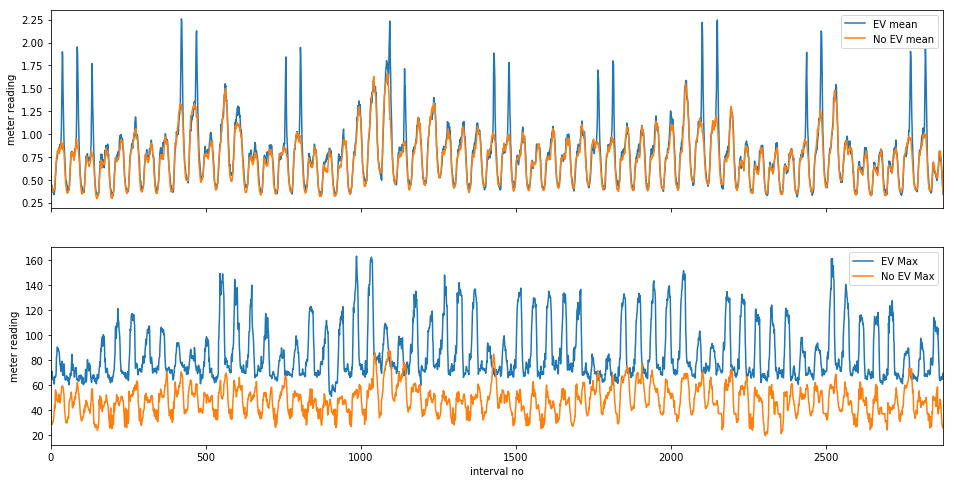

In [30]:

fig, axs = plt.subplots(2, 1, figsize=(16,8), sharex=True)
axs[0].plot(df_EV_meter_des['interval No.'], df_EV_meter_des['Median'], label='EV mean')
axs[0].plot(df_noEV_meter_des['interval No.'], df_noEV_meter_des['Median'], label= 'No EV mean')
axs[0].set_ylabel('meter reading')
axs[0].legend(loc='best')

axs[1].plot(df_EV_meter_des['interval No.'], df_EV_meter_des['Max'], label='EV Max')
axs[1].plot(df_noEV_meter_des['interval No.'], df_noEV_meter_des['Max'], label='No EV Max')
axs[1].set_ylabel('meter reading')
axs[1].set_xlabel('interval no')
axs[1].set_xlim(0,2880)
axs[1].legend(loc='best')

plt.show()